In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(0)

In [3]:
## Importando os dados
test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
## Estatísticas dos dataset
print(test.describe())
print(train.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.8

In [4]:
## Verificando os tipos de dados das features
train.info()
test.info()
## Verificando features contendo NaN
pd.isnull(train).sum()
pd.isnull(test).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
## Separando features numéricas
numeric_train = train.loc[:, ['PassengerId','Survived','Age', 'SibSp', 'Parch', 'Fare', 'Pclass']]
numeric_test = test.loc[:, ['PassengerId','Age', 'SibSp', 'Parch', 'Fare', 'Pclass']]
## Retirando linhas com NaN em train
numeric_train = numeric_train.dropna(axis = 0)
## Substituindo NaN por 0 em test
numeric_test = numeric_test.fillna(0)
print(numeric_test.shape)
print(numeric_train.shape)

(418, 6)
(714, 7)


In [6]:
## Criando novo dataframe para separar a feature Age
train_age_split = numeric_train.loc[:,['Survived', 'Age']]

## Separando feature Age por faixa e criando nova feature AgeGroup
bins = np.arange(0,90,10)
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

train_age_split['AgeGroup'] = pd.cut(numeric_train['Age'], bins, labels = labels)
train_age_split.head()

,Survived,Age,AgeGroup
0,0,22.0,20-30
1,1,38.0,30-40
2,1,26.0,20-30
3,1,35.0,30-40
4,0,35.0,30-40


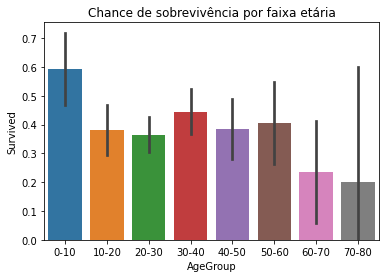

In [ ]:
# Plotando a distribuição de chances de sobrevivencia por faixa etária
plt.title('Chance de sobrevivência por faixa etária')
sns.barplot(x = 'AgeGroup', y = 'Survived', data = train_age_split)

**ANÁLISE DO GRÁFICO**

É possível notar uma maior chance de sobrevivência para o grupo de crianças com menos de 10 anos. Além disso os adultos com mais de 30 anos e menos de 60 anos possuem maior chance de sobreviver quando comparados com criânças e jovens ca faixa dos 10 aos 30 anos. Pode-se notar também uma grande variação nas chances de sobrevivência dos idosos com mais de 60 anos, tornando a análise inconclusiva.

**GRÁFICOS DAS DEMAIS FEATURES**

**SibSp**

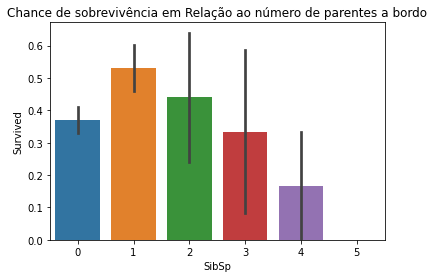

In [ ]:
## Plotando relação Chance de sobrevivência X Nº de parentes a bordo
plt.title('Chance de sobrevivência em Relação ao número de parentes a bordo')
sns.barplot(x = 'SibSp', y = 'Survived', data = numeric_train)

**ANÁLISE DO GRÁFICO**

Os passageiros que possuíam apenas um parente a bordo apresentaram maior chance de sobrevivência. Além disso a chance de sobrevivência diminui a medida que o número de parentes aumenta, exceto de 0 para 1. A chance de sobrevivência nula para passageiros com 5 parentes a bordo pode ser explicada pela pela baixa quantidade de passageiros com esta quantidade de parentes a bordo.

**Pclass**

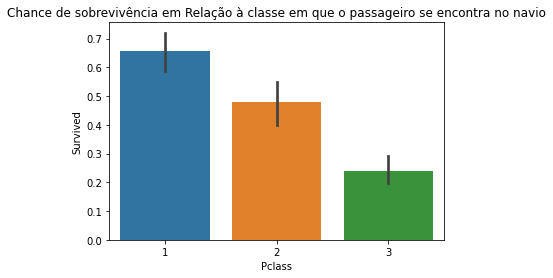

In [ ]:
## Plotando relação Chance de Sobrevivência X Classe do Navio
plt.title('Chance de sobrevivência em Relação à classe em que o passageiro se encontra no navio')
sns.barplot(x = 'Pclass', y = 'Survived', data = numeric_train);

**ANÁLISE DO GRÁFICO**

O gráfico indica que há maior chance de sobrevivência para passageiros pertencentes as classes mais altas do navio.

**Parch**

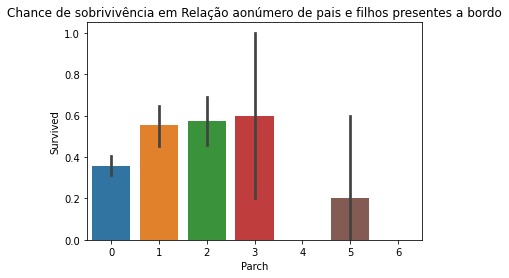

In [ ]:
## Plotando relação Chance de Sobrevivência X Nº de Pais e Filhos
plt.title('Chance de sobrivivência em Relação aonúmero de pais e filhos presentes a bordo')
sns.barplot(x = 'Parch', y = 'Survived', data = numeric_train)

**ANÁLISE DO GRÁFICO**

Pelo gráfico pode-se notar uma maior chance de sobrevivência para os passageiros com pelo menos um 1 e com menos de 3 filhos possuem maior chance de sobrevivência. 

In [8]:
## Treinamento do modelo e submissão das predições
# Filtrando features para treinamento e definindo target
X = numeric_train.drop(['PassengerId','Survived'], axis = 1)
y = numeric_train['Survived']

#Separando o banco de dados de treino e validação, validação será 20% do tamanho de treino
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Treinando o modelo
random_forest = RandomForestClassifier()
random_forest.fit(train_X, train_y)
preds = random_forest.predict(val_X)

#Validando o modelo
accurance = round(accuracy_score(preds,val_y)*100,2)
print(accurance)

67.13


**Avaliação do Modelo**

O modelo teve uma taxa de acerto de 67,13% , portanto apresentou baixa precisão em suas predições.

In [10]:
#Produzindo as predições
index = numeric_test['PassengerId']
prediction = random_forest.predict(numeric_test.drop('PassengerId', axis = 1))

#Produzindo o arquivo com as predições
output = pd.DataFrame({'PassengerId':index, 'Survived': prediction})
output.to_csv('submission.csv', index = False)